# Exploratory Data Analysis ENEM2018, ENEM2019, and ENEM2020

This notebook will contain an exploratory data analysis (EDA) of ENEM dataset (2018, 2019, and 2020). This is one of the most important steps in any data science project. The goal of this notebook is to provide a quick overview of the data and the methods used to explore it. The final objective is to select wich variables will be used as features in the machine learning models and wich variable will be used as a target variable.

|Year|Number of candidates|
|---|---|
|2018|5513733|
|2019|5095171|
|2020|5783109|

## Columns
|columns|type|description|values|
|--|--|--|--|
|id|int32|id|180007187591, 180007190460, ...|
|enem_year|int32|test year|2018, 2019, 2020|
|age|int32|age tag|1 (Less than 17 years-old) <br> 2 (17 years-old) <br> 3 (18 years-old) <br> ... <br>11 (Between 26 and 30 years-old) <br>...|
|sex|string|sex|F, M|
|sex|string|marital status|Single <br> Divorced <br> Married <br> Widower <br> Unknown|
|color_race|string|color/race|Brown, White, Black, Yellow, Indigenous, Unknown|
|high_school_status|string|schooling|Completed High School <br> Ends in the current year <br> Will complete High School the following year <br> Did not complete and is not attending High School|
|year_completion_high_school|int32|how much years ago finishes the high school|0 (Unknown), 1, 2, ..., 14 <br> **Obs**: 14 (2020) = 13 (2019) = 12 (2018) = Before 2007|
|school_type|string|school type|Public, Private, Foreign, Unknown|
|id_city_school|int32|city school id (ibge code)|3201308, 3515103, 1301852, ...|
|city_school|string|city school name|Sao Paulo, Rio de Janeiro, Curitiba, ...|
|state_school|string|state school name|SP, RJ, PR, ...|
|id_city_test|int32|city test id (ibge code)|3509502, 1200401, 2101400, ...|
|city_test|string|city test name|Sao Paulo, Rio de Janeiro, Curitiba, ...|
|state_test|string|state test name|SP, RJ, PR, ...|
|presence_day_1|string|presence in day 1|0 (Missed) <br> (1) Present <br> (2) Eliminated|
|presence_day_2|string|presence in day 2|0 (Missed) <br> (1) Present <br> (2) Eliminated|
|nature_science_score|float|nature science score|[0, 1000]|
|human_sciences_score|float|human sciences score|[0, 1000]|
|languages_codes_score|float|languages codes score|[0, 1000]|
|mathematics_score|float|mathematics score|[0, 1000]|
|ortography_score|float|redaction ortography score|0, 20, 40, ..., 200|
|understanding_score|float|redaction understanding score|0, 20, 40, ..., 200|
|structuring_score|float|redaction structuring score|0, 20, 40, ..., 200|
|argumentation_score|float|redaction argumentation score|0, 20, 40, ..., 200|
|proposal_score|float|redaction proposal score|0, 20, 40, ..., 200|
|redaction_score|float|redaction score|0, 20, 40, ..., 1000|
|father_schooling|string|father schooling|Didn't complete Elementary School <br> Completed High School <br> Completed Elementary School <br> Never studied <br> Unknown <br> Completed College <br> Completed Graduate <br>|
|mother_schooling|string|mother schooling|Didn't complete Elementary School <br> Completed High School <br> Completed Elementary School <br> Never studied <br> Unknown <br> Completed College <br> Completed Graduate <br>|
|father_profession_group|string|father profession group|Group A (farmer, animal breeder, beekeeper, ...) <br> Group B (domestic worker, security guard, salesman, receptionist, ...) <br> Group C (baker, shoemaker, machine operator, machinist, welder, ...) <br> Group D (technician, small trader, manager, foreman, ...) <br> Group E (dentist, university professor, doctor, engineer, ...) <br> Group F (Unknown)|
|mother_profession_group|string|mother profession group|Group A (farmer, animal breeder, beekeeper, ...) <br> Group B (domestic worker, security guard, salesman, receptionist, ...) <br> Group C (baker, shoemaker, machine operator, machinist, welder, ...) <br> Group D (technician, small trader, manager, foreman, ...) <br> Group E (dentist, university professor, doctor, engineer, ...) <br> Group F (Unknown)|
|family_members_number|int32|family members number|1, 2, 3, ...|
|family_income|string|family income|No income <br> Less than 1 minimum wage <br> Between 1-2 minimum wages <br> Between 2-3 minimum wages <br> Between 3-4 minimum wages <br> Between 4-5 minimum wages <br> Between 5-6 minimum wages <br> Between 6-7 minimum wages <br> Between 7-8 minimum wages <br> Between 8-9 minimum wages <br> Between 9-10 minimum wages <br> Between 10-11 minimum wages <br> Between 11-12 minimum wages <br> Between 12-13 minimum wages <br> Between 13-14 minimum wages <br> More than 14 minimum wages|
|bedrooms_qty|string|number of beedroom in candidate's home|No <br> One <br> Two <br> Three  <br> Four or more|
|cars_qty|string|number of cars in candidate's home|No <br> One <br> Two <br> Three  <br> Four or more|
|television_qty|string|number of television in candidate's home|No <br> One <br> Two <br> Three  <br> Four or more|
|phones_qty|string|number of phones in candidate's home|No <br> One <br> Two <br> Three  <br> Four or more|
|computer_qty|string|number of computers in candidate's home|No <br> One <br> Two <br> Three  <br> Four or more|
|internet_access|string|internet access|No <br> Yes|

## 1. Imports

In [9]:
import pandas as pd
import os 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('display.max_columns', None)
sns.set_palette('Paired')
sns.set_style("whitegrid")
plt.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['font.size'] = 14

## 2. Reading Data

In [2]:
processed_directory = sorted(filter(lambda dir: '.parquet' in dir, os.listdir('../data/processed')), reverse = True)[0]

data = pd.read_parquet('../data/processed/' + processed_directory)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163633 entries, 0 to 163632
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           163633 non-null  int64  
 1   enem_year                    163633 non-null  int64  
 2   age                          163633 non-null  object 
 3   sex                          163633 non-null  object 
 4   marital_status               161464 non-null  object 
 5   color_race                   163633 non-null  object 
 6   high_school_status           163633 non-null  object 
 7   year_completion_high_school  163633 non-null  int64  
 8   school_type                  163633 non-null  object 
 9   id_city_school               34793 non-null   float64
 10  city_school                  34793 non-null   object 
 11  state_school                 34793 non-null   object 
 12  id_city_test                 163633 non-null  int64  
 13 

In [3]:
cities = pd.read_csv('../data/external/cities.csv', sep = ';', usecols = ['ibge_code', 'lat_city', 'long_city', 'capital', 'state_lat', 'state_long', 'region'])
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ibge_code   5570 non-null   int64  
 1   lat_city    5570 non-null   float64
 2   long_city   5570 non-null   float64
 3   capital     5570 non-null   int64  
 4   state_lat   5570 non-null   float64
 5   state_long  5570 non-null   float64
 6   region      5570 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 304.7+ KB


In [4]:
# Joining the candidates data and cities info
data = data.merge(cities, left_on = 'id_city_test', right_on = 'ibge_code')

## 3. Exploratory Data Analysis

## 3.1 Candidates Presence

In [5]:
data['presence'] = np.where(data.eval('presence_day_1 + presence_day_2') == 2, 1, 0)
data.iloc[:, -4:]

,state_lat,state_long,region,presence
0,-3.79,-52.48,Norte,1
1,-3.79,-52.48,Norte,1
2,-3.79,-52.48,Norte,1
3,-3.79,-52.48,Norte,0
4,-3.79,-52.48,Norte,1
...,...,...,...,...
163628,-13.29,-41.71,Nordeste,1
163629,-13.29,-41.71,Nordeste,0
163630,1.99,-61.33,Norte,1
163631,-8.38,-37.86,Nordeste,0


### 3.1.1 By Year

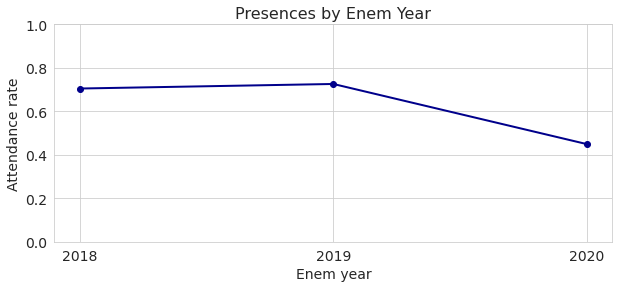

In [10]:
# as the presence is a binary data, so we can use mean to calculate the rate
# e.g. mean([1, 1, 0]) = 0.66 
#      mean([1, 1, 1, 0]) = 0.75

presences_by_year = data.groupby('enem_year').presence.mean()

presences_by_year.plot(marker = 'o', color = 'darkblue', linewidth = 2, figsize = (10, 4))
plt.title('Presences by Enem Year', fontsize = 16)
plt.xticks(presences_by_year.index)
plt.xlabel('Enem year')
plt.ylabel('Attendance rate')
plt.ylim(0, 1)
plt.savefig('../reports/figures/1.0-exploratory-data-analysis-enem/missed_candidates.jpeg', bbox_inches = 'tight', dpi = 300)
plt.show()

### 3.2.2 By Family Income

In [11]:
family_income_label = [
  'No income',
  'Less than 1 minimum wage',
  'Between 1-1.5 minimum wages',
  'Between 1.5-2 minimum wages',
  'Between 2-2.5 minimum wages',
  'Between 2.5-3 minimum wages',
  'Between 3-4 minimum wages',
  'Between 4-5 minimum wages',
  'Between 5-6 minimum wages',
  'Between 6-7 minimum wages',
  'Between 7-8 minimum wages',
  'Between 8-9 minimum wages',
  'Between 9-10 minimum wages',
  'Between 10-12 minimum wages',
  'Between 12-15 minimum wages',
  'Between 15-20 minimum wages',
  'More than 20 minimum wages'
]

In [12]:
presences_by_family_income = data.groupby(['enem_year', 'family_income']).presence.mean().unstack().T.loc[family_income_label]
presences_by_family_income

enem_year,2018,2019,2020
family_income,,,
No income,0.627744,0.681000,0.386057
Less than 1 minimum wage,0.669857,0.692752,0.404813
Between 1-1.5 minimum wages,0.670293,0.693232,0.401171
Between 1.5-2 minimum wages,0.698574,0.717569,0.429085
Between 2-2.5 minimum wages,0.705012,0.731046,0.484235
Between 2.5-3 minimum wages,0.732401,0.760506,0.514171
Between 3-4 minimum wages,0.754553,0.777089,0.576070
Between 4-5 minimum wages,0.795585,0.802632,0.614096
Between 5-6 minimum wages,0.796937,0.817601,0.610718


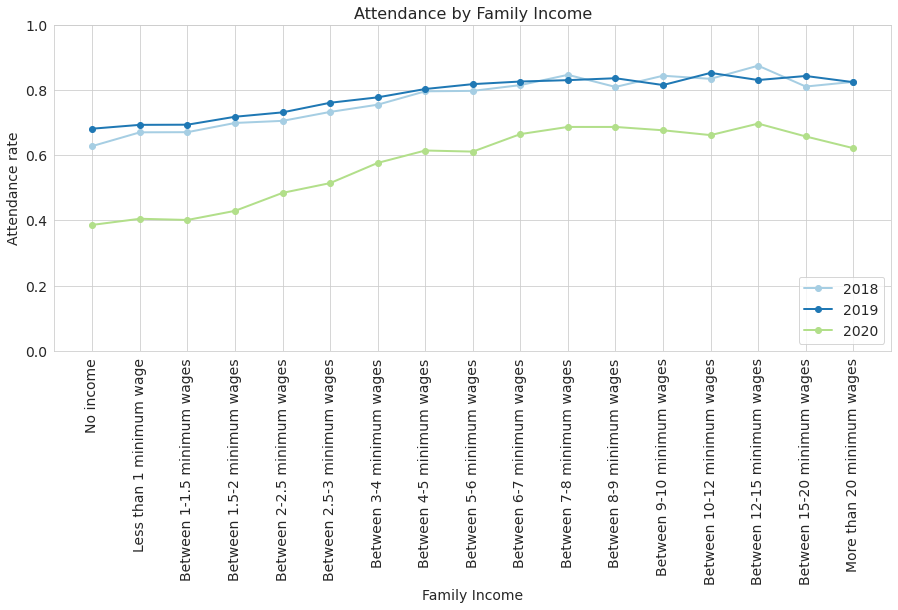

In [13]:
presences_by_family_income.plot(figsize = (15, 6), linewidth = 2, marker = 'o')

plt.xticks(rotation = 90)
plt.xticks(range(len(family_income_label)), family_income_label)
plt.title('Attendance by Family Income', fontsize = 16)
plt.xlabel('Family Income')
plt.ylabel('Attendance rate')
plt.ylim(0, 1)
plt.legend(loc = 'lower right')
plt.savefig('../reports/figures/1.0-exploratory-data-analysis-enem/missed_candidates_family_income.jpeg', bbox_inches = 'tight', dpi = 300)
plt.show()

### 3.2.3 By School Type

In [14]:
presences_by_school_type = data.query('school_type != "Foreign"').groupby(['enem_year', 'school_type']).presence.mean().unstack()
presences_by_school_type

school_type,Private,Public,Unknown
enem_year,,,
2018,0.716418,0.735886,0.681026
2019,0.948946,0.811561,0.683108
2020,0.824357,0.544391,0.405815


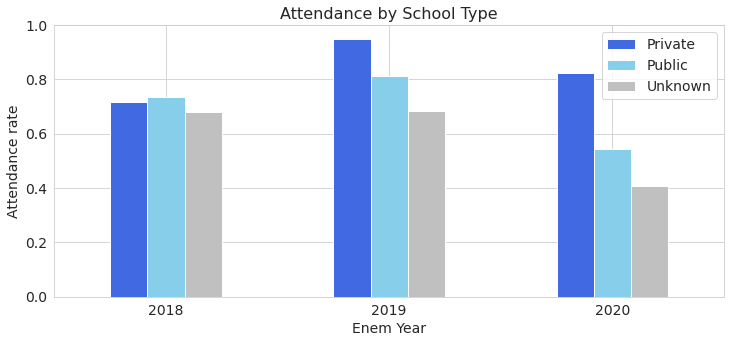

In [15]:
presences_by_school_type.plot.bar(figsize = (12, 5), color = ['royalblue', 'skyblue', 'silver'])

plt.xticks(rotation = 0)
plt.title('Attendance by School Type', fontsize = 16)
plt.xlabel('Enem Year')
plt.ylabel('Attendance rate')
plt.ylim(0, 1)
plt.legend(loc = 'upper right')
plt.savefig('../reports/figures/1.0-exploratory-data-analysis-enem/missed_candidates_school_type.jpeg', bbox_inches = 'tight', dpi = 300)
plt.show()

### 3.2.4 By Age

In [16]:
age_label = [
  'Less than 17 years-old',
  '17 years-old',
  '18 years-old',
  '19 years-old',
  '20 years-old',
  '21 years-old',
  '22 years-old',
  '23 years-old',
  '24 years-old',
  '25 years-old',
  'Between 26 and 30 years-old',
  'Between 31 and 35 years-old',
  'Between 36 and 40 years-old',
  'Between 41 and 45 years-old',
  'Between 46 and 50 years-old',
  'Between 51 and 55 years-old',
  'Between 56 and 60 years-old',
  'Between 61 and 65 years-old',
  'Between 66 and 70 years-old',
  'More than 70 years-old'
]

In [17]:
presences_by_age = data.groupby(['enem_year', 'age']).presence.mean().unstack().T.loc[age_label]
presences_by_age

enem_year,2018,2019,2020
age,,,
Less than 17 years-old,0.875132,0.877969,0.656599
17 years-old,0.859532,0.880955,0.673129
18 years-old,0.799205,0.828028,0.572685
19 years-old,0.726753,0.743608,0.489952
20 years-old,0.691887,0.699219,0.428758
21 years-old,0.643371,0.651593,0.392124
22 years-old,0.641192,0.638172,0.364553
23 years-old,0.597619,0.594218,0.334417
24 years-old,0.583666,0.577705,0.317607


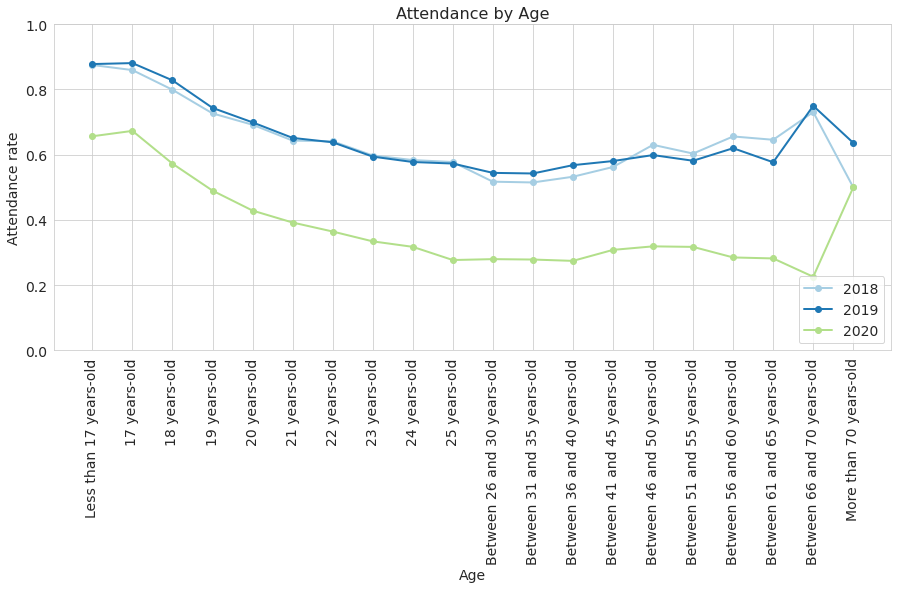

In [18]:
presences_by_age.plot(figsize = (15, 6), linewidth = 2, marker = 'o')

plt.xticks(rotation = 90)
plt.xticks(range(len(age_label)), age_label)
plt.title('Attendance by Age', fontsize = 16)
plt.xlabel('Age')
plt.ylabel('Attendance rate')
plt.ylim(0, 1)
plt.legend(loc = 'lower right')
plt.savefig('../reports/figures/1.0-exploratory-data-analysis-enem/missed_candidates_age.jpeg', bbox_inches = 'tight', dpi = 300)
plt.show()

### 3.2.5 By Region and State

We will consider just the test state and test city for this study.

In [20]:
presences_by_region = data.groupby(['enem_year', 'region']).presence.mean().unstack()
presences_by_region

region,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
enem_year,,,,,
2018,0.682077,0.725244,0.689489,0.699349,0.695171
2019,0.709600,0.745409,0.703679,0.719865,0.720353
2020,0.411500,0.485388,0.417608,0.434351,0.451183


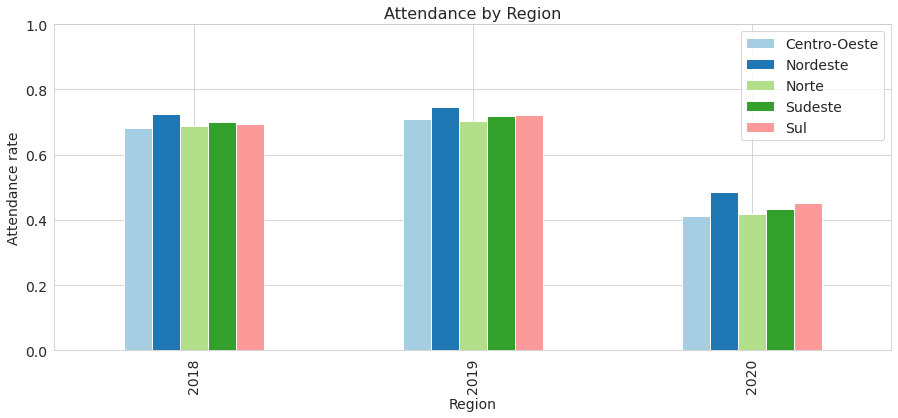

In [21]:
presences_by_region.plot.bar(figsize = (15, 6))

plt.xticks(rotation = 90)
plt.title('Attendance by Region', fontsize = 16)
plt.xlabel('Region')
plt.ylabel('Attendance rate')
plt.ylim(0, 1)
plt.legend(loc = 'upper right')
plt.savefig('../reports/figures/1.0-exploratory-data-analysis-enem/missed_candidates_regions.jpeg', bbox_inches = 'tight', dpi = 300)
plt.show()

In [22]:
presences_by_state_test = data.groupby(['enem_year', 'state_test']).presence.mean().unstack().T
presences_by_state_test

enem_year,2018,2019,2020
state_test,,,
AC,0.724234,0.703242,0.441109
AL,0.738012,0.725771,0.477701
AM,0.607973,0.623355,0.298800
AP,0.685000,0.714602,0.450980
BA,0.712427,0.718537,0.452269
CE,0.699328,0.738960,0.491452
DF,0.689387,0.703271,0.451777
ES,0.715290,0.712644,0.422710
GO,0.700054,0.729777,0.420400


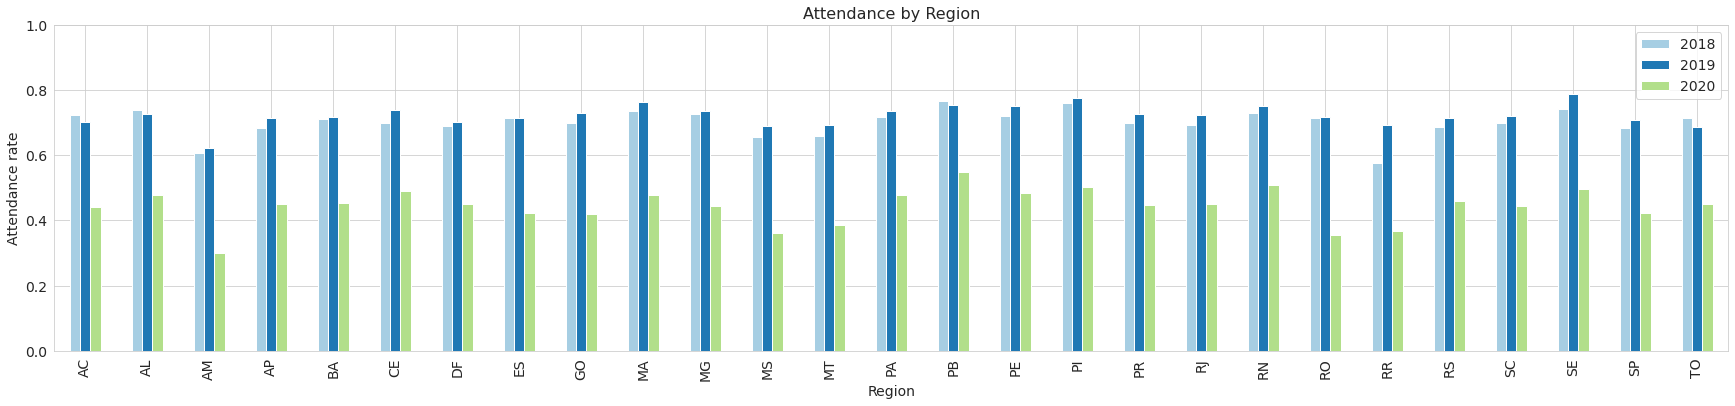

In [23]:
presences_by_state_test.plot.bar(figsize = (30, 6))

plt.xticks(rotation = 90)
plt.title('Attendance by Region', fontsize = 16)
plt.xlabel('Region')
plt.ylabel('Attendance rate')
plt.ylim(0, 1)
plt.legend(loc = 'upper right')
plt.savefig('../reports/figures/1.0-exploratory-data-analysis-enem/missed_candidates_states.jpeg', bbox_inches = 'tight', dpi = 300)
plt.show()